# Implementation of the SIR Model


## Libraries

In [2]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

## References


This notebook is based on several models and techniques published in:
  1. Kermack, W. and McKendrick, A.(1927). A contribution to the mathematical theory of epidemics. Proc. R. Soc. London A 115, 700-721.  
  1. [https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)
  1. Parro, V. C., Lafet, M., Ippolito, F., Toporcov, T. N. (2020). Predicting COVID-19 in very large countries: the
case of Brazil.
 

## The SIR epidemic model 

>The SIR epidemic model, is a mathematical compartmental model which describe the spread of an infectious disease in a host population.
The idea is to split this population in 3 groups: the susceptibles S, capable of contracting the disease and becoming infective; the infectious I, capable of transmitting the disease to susceptibles; and the recovered R, permanently immune after healing.
$$ S(t) + I(t) + R(t) = P $$
where P represents the total amount of inhabitants in this population.


>In addition, the propagation model is based on 3 other equations:
$$ \begin{split}
   \frac{dS(t)}{dt} & = \frac{-\beta I(t) S(t)}{P} \\
   \frac{dI(t)}{dt} & = \frac{\beta I(t) S(t)}{P} -\gamma I(t) \\
   \frac{dR(t)}{dt} & = \gamma I(t) \\
   \end{split} $$

### Hypotheses

>As a first approach, we assume that:
 1. The population has an invariant position with **P** individuals
 1. The average transmission rate $\large \beta$ and recovery rate $\large \gamma$ are constant
 1. Demographic variations such as births and deaths are not considered
 1. The population is evenly distributed

### Constants

In [6]:
#Brazil's current population 
P = 211e6

#Initial values
I0 = 1
R0 = 0
S0 = P - I0


### Differential equation system implementation

>To build the model we have to define the differential equation system by a function.

In [7]:
# The SIR model differential equations.
def SIR(y, t, P, Beta, Gamma):
    S, I, R = y
    dSdt = -(Beta * I * S)/P
    dIdt = (Beta * I * S)/P  - Gamma * I
    dRdt = Gamma * I
    return dSdt, dIdt, dRdt

## Model test: the case of Brazil

>According to https://www.nature.com/articles/s41598-020-76257-1/tables/1, the different SIR parameters for Brazil are: \\
>>$\beta = 0.4417 \\
\gamma = 0.1508 $ 

In [12]:
#Utilization of the SIR model

#Transmission rate
Beta = 0.4417

#Recovery rate per day
Gamma = 0.1508

# A grid of time points (in days)
t = np.linspace(0, 200, 1000)

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid t.
result = odeint(SIR, y0, t, args=(P, Beta, Gamma))
S, I, R = result.T

### Visualization

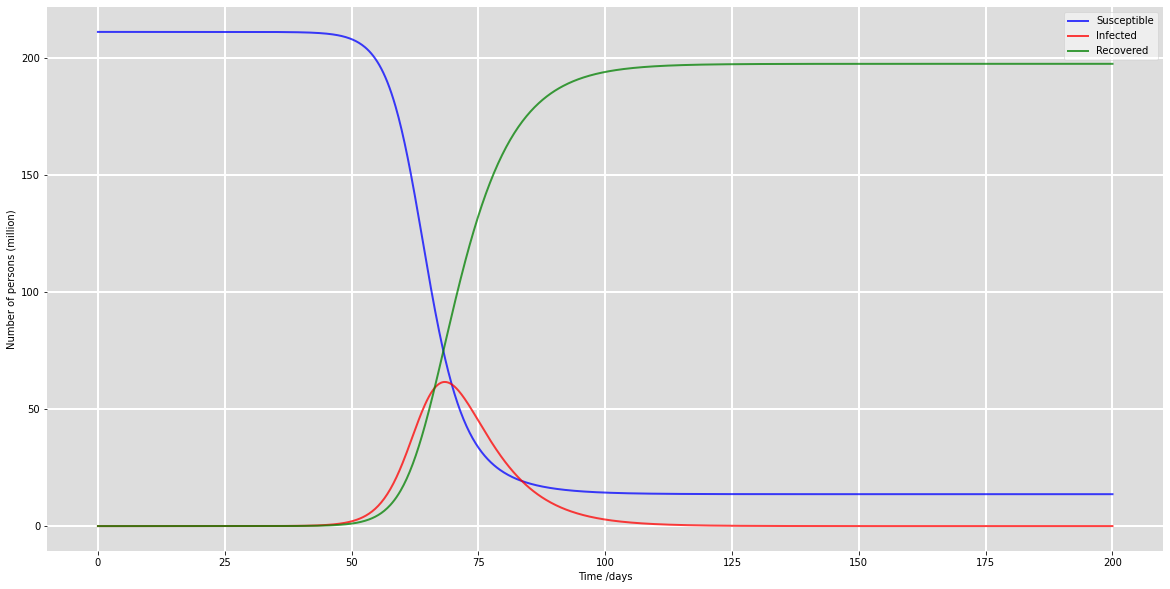

In [13]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize=(20,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

#Data divided by 1e6 to convert to million people
ax.plot(t, S/1e6, 'b', alpha=0.75, lw=2, label='Susceptible')
ax.plot(t, I/1e6, 'r', alpha=0.75, lw=2, label='Infected')
ax.plot(t, R/1e6, 'g', alpha=0.75, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of persons (million)')
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()